## IMAGE CLASSIFIER

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
tf.__version__

'2.2.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [6]:
print("x_train = ",x_train_full.shape,"y_train = ",y_train_full.shape,"x_test = ",x_test.shape,"y_test = ",y_test.shape)

x_train =  (60000, 28, 28) y_train =  (60000,) x_test =  (10000, 28, 28) y_test =  (10000,)


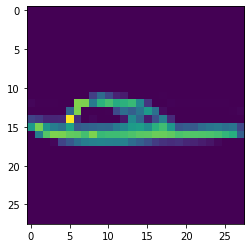

In [7]:
plt.imshow(x_train_full[30])

In [8]:
y_train_full[30]

5

In [9]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
class_names[y_train_full[30]]

'Sandal'

In [11]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

#### DATA NORMALIZATION

In [12]:
x_train_n = x_train_full/255.
x_test_n = x_test/255.

#### SPLIT THE DATA INTO TRAIN / VALIDATION/TEST DATASETS
###### Training data = used for training the model
###### Validation data = used for tuning the hyperparameters and evaluate the model
###### Test data = used to test the model after the model has gone through initial vetting by the validation set

In [13]:
x_valid,x_train = x_train_n[:5000],x_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test_n

In [14]:
y_valid

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [15]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

##### CREATE THE MODEL ARCHITECTURE
###### 1. SEQUENTIONAL MODEL API(SIMPLE AND STRAIGHT FORWARD)
###### 2. FUNCTIONAL API(COMPLEX NN)

In [16]:
np.random.seed(42) #random seed is used to replicate the same result everytime
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential() # USING SEQUENTIAL API
model.add(keras.layers.Flatten(input_shape=[28,28])) # input layer, converting 2D to 28*28 pixel using flatten
model.add(keras.layers.Dense(300,activation="relu")) # 1st hidden layer, 300=no. of neurons, relu=activation function
model.add(keras.layers.Dense(100,activation="relu")) # 2nd hidden layer
model.add(keras.layers.Dense(10,activation="softmax")) # output layer, categories=10
#relu = 0 for all negative numbers or relu = output for the positive numbers

In [18]:
model.summary() 
# param
# dense = 784*300+300 = 235500
# dense_1 = 300*100+100 = 30100
# dense_2 = 100*10+10 = 1010
# none  = no limit on input data

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# if went to see the structure of neural network(using pydot)

In [19]:
#import pydot
#keras.utils.plot_model(model)

In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

learning processes 


In [25]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
# scc = for categorical data
#sgd = stocashtic gradient descent
# for binary labels = binary_cross_entropy

In [26]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))
# by default epochs = 1

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4348 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5347 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4123 - accuracy: 0.8561 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3752 - accuracy: 0.8677 - val_loss: 0.3707 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3612 - val_accuracy

In [27]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
model_history.history

{'loss': [0.7237026691436768,
  0.4841923415660858,
  0.4391198754310608,
  0.41227152943611145,
  0.39399123191833496,
  0.3752003610134125,
  0.3632165193557739,
  0.3516635298728943,
  0.3413761854171753,
  0.3319443166255951,
  0.3239230215549469,
  0.31479373574256897,
  0.3079524636268616,
  0.3021050691604614,
  0.29448434710502625,
  0.28899240493774414,
  0.2838404178619385,
  0.2777338922023773,
  0.27274635434150696,
  0.26731595396995544,
  0.2623072564601898,
  0.25757795572280884,
  0.2533426284790039,
  0.24854013323783875,
  0.24433575570583344,
  0.240463525056839,
  0.2362229824066162,
  0.23282670974731445,
  0.2284305989742279,
  0.22501768171787262],
 'accuracy': [0.7643091082572937,
  0.831709086894989,
  0.8456000089645386,
  0.856145441532135,
  0.8619636297225952,
  0.8676727414131165,
  0.8714545369148254,
  0.8747090697288513,
  0.8790909051895142,
  0.882381796836853,
  0.8840181827545166,
  0.8865272998809814,
  0.8894000053405762,
  0.8918181657791138,
  0

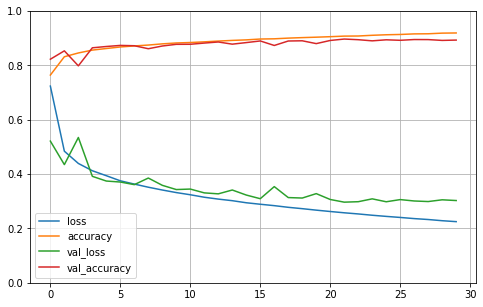

In [29]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
#evaluating performance and predicting

In [31]:
model.evaluate(x_test,y_test)
# first = loss(0,3604) , second value = accuracy(0.8873)

313/313 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8825


[0.33740103244781494, 0.8824999928474426]

In [32]:
x_new = x_test[:] # considering first three samples from test dataset

In [33]:
y_proba = model.predict(x_new) # probability to each class
y_proba.round(2) 

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [34]:
y_pred = model.predict_classes(x_new)
y_pred
# as category starts from 0 to 9
# for first record category = 9 which can be confirmed by above probabilities
# category of second sample = 2
# category of third sample = 1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [35]:
pred_names = np.array(class_names)[y_pred]
pred_names

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [36]:
data = {'test':[x_new],'prediction':[pred_names]}
df = pd.DataFrame(data,columns = ['test','prediction'])
df

,test,prediction
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[Ankle boot, Pullover, Trouser, Trouser, Shirt..."


AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44) Pullover


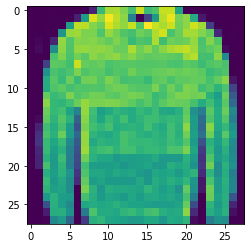

In [37]:
print(plt.imshow(x_test[20]))
print(plt.imshow(x_test[20]),pred_names[20])

AxesImage(54,36;334.8x217.44)


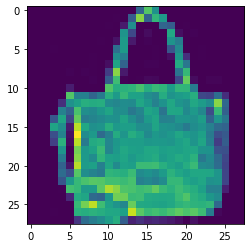

In [38]:
print(plt.imshow(x_test[2000]))

AxesImage(54,36;334.8x217.44)


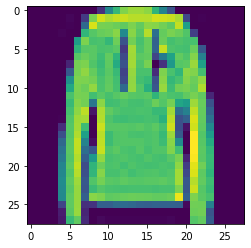

In [39]:
print(plt.imshow(x_test[525]))

# SAVING WORKING DIRECTORY

In [40]:
model.save("saved_ann1.h5")

In [41]:
%pwd #present working directory

'C:\\Users\\aishw\\OneDrive\\Documents\\Practice\\CNN'

In [42]:
del model

In [43]:
keras.backend.clear_session()

In [44]:
model = keras.models.load_model("saved_ann1.h5")

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_pred = model.predict(x_new)
print(y_pred)

[[4.91383071e-06 3.88287503e-07 9.61618571e-05 ... 2.94578485e-02
  7.10733468e-04 9.58938181e-01]
 [7.78231515e-06 2.38797302e-08 9.83692944e-01 ... 4.58459876e-12
  5.75275383e-09 1.28239780e-11]
 [1.57633963e-06 9.99997973e-01 1.19112675e-08 ... 1.97802956e-13
  6.82928425e-09 1.11782079e-12]
 ...
 [1.31633226e-02 1.01702642e-06 6.69755274e-04 ... 4.09234417e-06
  9.84870613e-01 6.94945479e-09]
 [4.60758156e-06 9.99923706e-01 3.72328714e-07 ... 1.90752657e-11
  1.92456241e-07 5.23397077e-08]
 [3.77800934e-05 3.38426912e-06 2.59540073e-04 ... 4.98309312e-03
  1.66951248e-03 8.23582959e-05]]


# USING CALLBACKS DURING TRAINING

In [47]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
model = keras.models.Sequential([
        keras.layers.Dense(30,activation="relu",input_shape=[8]),
        keras.layers.Dense(30,activation="relu"),
        keras.layers.Dense(1)])

In [49]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [57]:
#history = model.fit(x_train,y_train,epochs=10,
 #                   validation_data=(x_valid,y_valid),
  #                  callbacks = [checkpoint_cb])

In [58]:
del model
keras.backend.clear_session()


In [61]:
#model= keras.models.load_model("Model-10.h5")

In [63]:
#mse_test = model.evaluate(x_test,y_test)

# BEST MODEL ONLY

In [ ]:
del model
keras.backend.clear_session()


In [59]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=[8]),
                                 keras.layers.Dense(30,activation="relu"),
                                 keras.layers.Dense(1)])

In [64]:
model.compile(loss="mse",optimizer = keras.optimizers.SGD(lr=1e-3))

In [65]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [66]:
history = model.fit(x_train,y_train, epochs=10,
                   validation_data=(x_valid,y_valid),
                   callbacks = [checkpoint_cb])

Epoch 1/10


ValueError: in user code:

    C:\Users\aishw\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\aishw\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\aishw\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\aishw\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\aishw\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\aishw\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\aishw\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape [None, 28, 28]
